In [1]:

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import commonfunctions as cf
from commonfunctions import *
import cv2
import numpy as np
from sklearn import *
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin

from functions import *
from sklearn.metrics import accuracy_score


digits = datasets.load_digits()

In [2]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [3]:
import os
from os import listdir

In [4]:
target = []
for i in range (2):
    for j in range (54):
        target.append(chr(ord('0')+i))

for i in range (6):
    for j in range (54):
        target.append(chr(ord('A')+i))

target = np.array(target)
print(target.shape)

(432,)


In [5]:
dataset = []
#load dataset
folder_dir = "./datasets/ImgCopy"
for image in os.listdir(folder_dir):
    dataset.append(cv2.cvtColor(cv2.imread(folder_dir+'/'+image), cv2.COLOR_BGR2GRAY))

In [6]:
dataset = np.array(dataset)

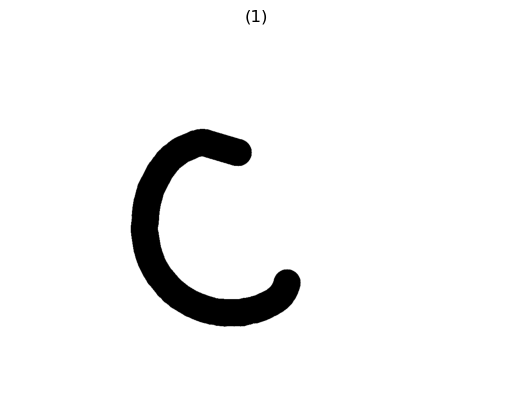

In [7]:
show_images([dataset[266]])

In [8]:
show_images(get_letters(cv2.cvtColor(cv2.imread('./datasets/Img/img005-047.png'), cv2.COLOR_BGR2GRAY)))

<Figure size 0x0 with 0 Axes>

In [25]:
training_set = []
for i in range(len(dataset)):
    if(i%55 != 0):
        temp = get_letters(dataset[i])
        if(len(temp) != 0):
            training_set.append(temp[0])
        else:
         target = np.delete(target,i)
        print(i)

141565.0
1
312119.0
2
65101.5
3
87157.0
4
43662.0
5
28832.0
6
69849.5
7
298308.0
8
53914.0
9
32732.0
10
154705.5
11
43084.5
12
210504.5
13
127924.5
14
48858.5
15
178536.0
16
76040.5
17
94121.0
18
43108.5
19
83831.0
20
51782.0
21
165255.0
22
81416.0
23
130713.5
24
136684.5
25
90739.0
26
78841.0
27
52975.0
28
87837.0
29
113045.0
30
58132.0
31
89909.0
32
40903.0
33
56086.5
34
137362.0
35
146084.0
36
210274.5
37
38704.5
38
75624.5
39
139289.5
40
97067.0
41
213828.0
42
195155.0
43
149281.5
44
46448.5
45
91785.5
46
158525.0
47
68817.5
48
95291.5
49
90356.0
50
76493.5
51
136360.5
52
100517.0
53
147503.0
54
54343.0
56
82380.0
57
35489.0
58
23798.0
59
20804.0
60
37860.5
61
37455.5
62
52587.5
63
31073.5
64
17586.5
65
35319.5
66
32414.0
67
64603.5
68
36252.0
69
28062.5
70
57844.5
71
25867.0
72
29423.0
73
39106.5
74
36888.0
75
18787.0
76
53357.0
77
31698.0
78
68200.5
79
32630.0
80
24255.0
81
22972.0
82
18810.0
83
17509.5
84
27455.0
85
32458.0
86
31541.0
87
37093.0
88
21357.0
89
29691.0
90
50912.5


In [10]:
training_set = np.array(training_set)

In [11]:
print(len(training_set))
print(len(target))

432
432


In [12]:
#classifier
clf = svm.SVC(gamma = 0.001, C =100)

In [13]:
print(training_set.shape)

(432, 28, 28)


In [14]:
nsamples, nx, ny = training_set.shape
training_set_2 = training_set.reshape((nsamples,nx*ny))

In [15]:
print(training_set_2.shape)

(432, 784)


In [16]:
#Loads in all but the last 10 points to use them for testing
# X,y = digits.data[:], digits.target[:]
X,y = training_set_2, target

In [17]:
#Train 
clf.fit(X,y)

SVC(C=100, gamma=0.001)

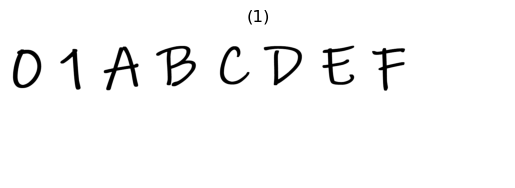

In [26]:
letter = cv2.cvtColor(cv2.imread('./test_images/classification/test1.png'), cv2.COLOR_BGR2GRAY)
y_true = ['A', 'B', '0']
show_images([letter])

8417.5
2238.0
3164.5
5273.5
3661.5
2511.0
3528.5
6411.5


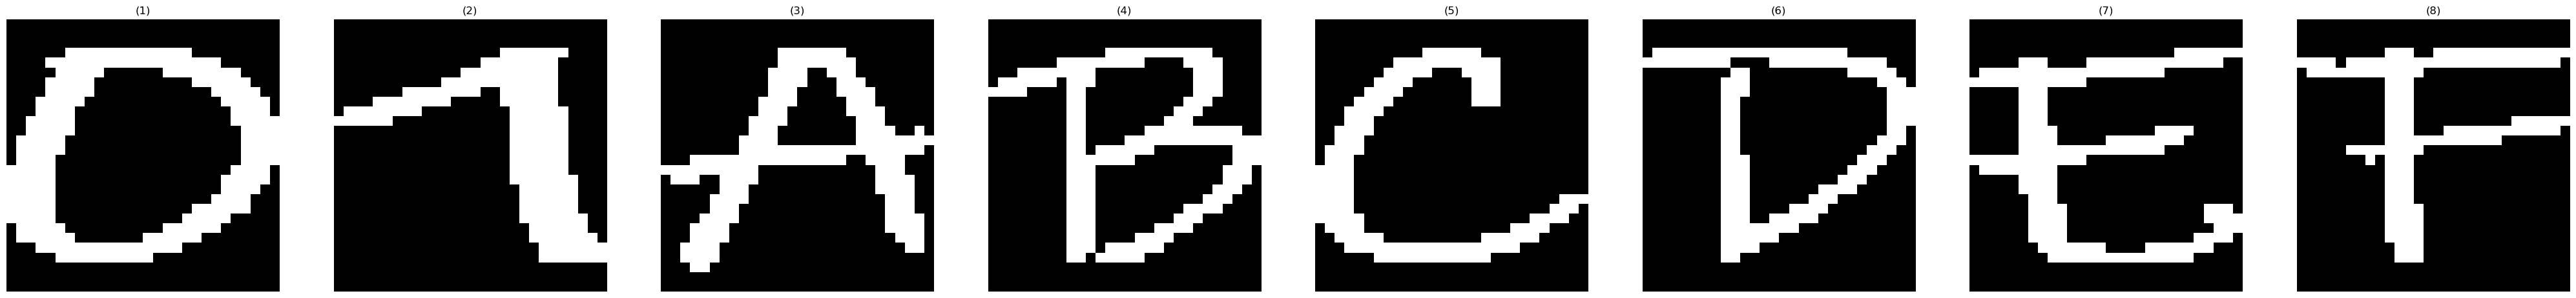

In [27]:
letter = get_letters(letter)
show_images(letter)

In [28]:
letter = np.array(letter)
letter2 =[]
for i in range (len(letter)):
    letter2.append( letter[i].reshape(28*28))
letter2= np.array(letter2)
print(letter2.shape)


(8, 784)


In [29]:
y_predict =clf.predict(letter2) 
print(y_predict)

['0' '1' 'A' 'D' 'C' 'D' 'F' 'F']


In [22]:
accuracy_score(y_true, y_predict)

0.6666666666666666

In [23]:
test_set = []
y_true = []
i = 0
while i <len(dataset):
    test_set.append(get_letters(dataset[i]))
    y_true.append(target[i])
    i += 55
    
test_set_2 = []
test_set = np.array(test_set)
y_true = np.array(y_true)
for i in range (len(test_set)):
    test_set_2.append( test_set[i].reshape(28*28))
test_set_2= np.array(test_set_2)
print(test_set_2.shape)
print(test_set.shape)
print(y_true.shape)

188714.5
52779.0
109099.5
141468.5
88436.5
177631.0
120662.5
95318.5
(8, 784)
(8, 1, 28, 28)
(8,)


In [24]:
y_predict =clf.predict(test_set_2) 
print(y_predict)
accuracy_score(y_true, y_predict)

['0' '1' 'A' 'B' 'C' 'D' 'E' 'F']


1.0